In [5]:
import matplotlib.pyplot as plt
plt.rc('font', size=12)
import pandas as pd
import seaborn as sns
import warnings 

import Coverage as cov

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Params

In [6]:
#get list of client rules sorted by count
popSize = 10
# clientFilename = "../Data/ICU/Best/"
# clientFilename = "../Data/ICU/Test/"
clientFilename = "../Data/Sepsis/Best/"

ldpFilename = "../Results/Sepsis_Base_TEST.csv"
# ldpFilename = "../Results/ICU_Base_TEST_2.csv"
# ldpFilename = "../Results/ICU_Ruleset_MCTS_TEST.csv"
# ldpFilename = "../Results/ICU_TEST_2.csv"
# ldpFilename = "../Results/Sepsis_Ruleset_MCTS_Test.csv"

graphName = '../Results/Graphs/test' #Name of count coverage graphs
popThresh = 0.01 #Percentage match count


## Load Client Rules

In [7]:
# Load Client Rule Trees and Text Rule Structures, and get dataframe of rules and their counts
clientTrees, clientRules, clientDF = cov.loadClientRules(popSize, clientFilename)
clientDF

,Rule,Rule Count,Percent of Population
22,"F[0,0](((Calcium <= 0.000 & Potassium <= 0.000...",39,1.0
562,"F[0,0]((((Calcium < 0.000 & Potassium < 0.000)...",9,0.9
231,"G[0,0]((AST <= 0.000 | O2Sat >= 0.000))",3,0.3
657,"((AST >= 0.000) U[0,0] (SepsisLabel = 0.000))",2,0.2
516,"((MAP >= 0.000) U[0,0] (SBP <= 0.000))",2,0.2
...,...,...,...
343,"F[0,0](((pH >= 0.000 & BUN >= 0.000) & EtCO2 <...",1,0.1
344,"((Chloride <= 0.000) U[0,0] (Magnesium >= 0.000))",1,0.1
345,"F[0,0]((((WBC <= 0.000 | PTT <= 0.000) -> Resp...",1,0.1
346,"F[0,0]((WBC >= 0.000 & FiO2 >= 0.000))",1,0.1


In [8]:
clientDF.to_csv("Client Rules.csv")

## Load LDP Ruleset

In [9]:
ldpDF, ldpTrees, ldpRules = cov.loadLDPRuleset(ldpFilename)
ldpDF

,Rule,Percent Count
606,"G[0,0]((SepsisLabel = 0.000 -> SepsisLabel = 0...",1.0
971,"((SepsisLabel = 0.000) U[0,0] (SepsisLabel = 0...",0.8
378,"G[0,0]((SepsisLabel = 0.000 & SepsisLabel = 0....",0.7
205,"F[0,0]((SepsisLabel = 0.000 & SepsisLabel = 0....",0.6
1202,"G[0,0]((O2Sat = 0.000 | AST < 0.000))",0.3
...,...,...
736,"G[0,0]((Calcium < 0.000 | Chloride = 0.000))",0.1
735,"G[0,0]((AST > 0.000 -> Phosphate = 0.000))",0.1
734,"G[0,0]((HCO3 = 0.000 -> MAP > 0.000))",0.1
733,"G[0,0]((Chloride < 0.000 & BUN = 0.000))",0.1


## Complexity Analysis

In [10]:
k = 4 #k-ary tree
h = 17 #height
k**h

17179869184

## Get Table of Structure Counts - Count of rules above threshold

In [11]:
covDF, countDF, clientTrees = cov.getCoverageTable(popThresh, ldpDF, ldpTrees, clientDF)
countDF.to_csv(ldpFilename + "_CovCountDF.csv")
covDF

,Total Client Rules,Found Rules,Non Rules,Precision
0,999,2168,0,1.0


In [12]:
countDF

,LDP Rule,Client Rule,LDP Count,Client Count
0,"F[0,0]((AST = 0.000 & Magnesium = 0.000))","F[0,0]((AST <= 0.000 & Magnesium >= 0.000))",0.1,0.1
1,"((Chloride > 0.000) U[0,0] (Platelets < 0.000))","((Chloride >= 0.000) U[0,0] (Platelets <= 0.000))",0.1,0.1
2,"G[0,0]((Glucose < 0.000 | SepsisLabel > 0.000))","G[0,0]((SepsisLabel >= 0.000 | Glucose <= 0.000))",0.1,0.1
3,"G[0,0]((Fibrinogen = 0.000 | DBP < 0.000))","G[0,0]((Fibrinogen >= 0.000 | DBP <= 0.000))",0.1,0.1
4,"G[0,0]((Fibrinogen = 0.000 -> SepsisLabel = 0....","G[0,0]((Fibrinogen >= 0.000 -> SepsisLabel = 0...",0.1,0.1
...,...,...,...,...
2163,"G[0,0]((Phosphate < 0.000 & Alkalinephos < 0.0...","G[0,0]((Alkalinephos <= 0.000 & Phosphate <= 0...",0.1,0.1
2164,"G[0,0]((FiO2 = 0.000 | PaCO2 = 0.000))","G[0,0]((PaCO2 <= 0.000 | FiO2 <= 0.000))",0.1,0.1
2165,"G[0,0]((Resp = 0.000 | HCO3 < 0.000))","G[0,0]((HCO3 <= 0.000 | Resp >= 0.000))",0.1,0.1
2166,"G[0,0]((Potassium > 0.000 | Hgb = 0.000))","G[0,0]((Hgb <= 0.000 | Potassium >= 0.000))",0.1,0.1


## Get number of unique structure types

In [13]:
structDF = cov.countUniqueStructuresNoVars(clientTrees, ldpTrees)
structDF

CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 & x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x < 0.000 & x < 0.000) & x < 0.000) & x < 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x <= 0.000 | x <= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x <= 0.000 | x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x <= 0.000 -> x <= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x >= 0.000 | x >= 0.000) -> x >= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 & x <= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 -> x <= 0.000) & x <= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 -> x <= 0.000) -> x >= 0.000) -> x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x >= 0.000 -> x >= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 & x <= 0.000) | x <= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x >= 0.000) -> x <= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0

CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x >= 0.000) & x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x >= 0.000 | x <= 0.000) & x <= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0](((x >= 0.000 | x >= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0](((x <= 0.000 | x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x <= 0.000) -> x <= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x >= 0.000 | x <= 0.000) | x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x >= 0.000 -> x <= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 & x <= 0.000) -> x >= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 -> x <= 0.000) | x <= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x >= 0.000 -> x >= 0.000) & x <= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0](((x <= 0.000 & x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x >= 0.000) & x >= 0.000) & x >= 0.0

CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x <= 0.000) | x <= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x <= 0.000) | x <= 0.000) -> x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 -> x <= 0.000) | x <= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 & x >= 0.000) -> x <= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x >= 0.000) -> x >= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 -> x <= 0.000) -> x <= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x >= 0.000) & x >= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 -> x >= 0.000) & x >= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x <= 0.000) -> x >= 0.000) -> x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 -> x >= 0.000) & x <= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x <= 0.000) -> x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FO

CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 | x >= 0.000) | x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x <= 0.000) & x <= 0.000) | x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x >= 0.000) | x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 | x >= 0.000) & x >= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 & x >= 0.000) -> x >= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 -> x >= 0.000) -> x <= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 -> x >= 0.000) | x <= 0.000) & x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 | x >= 0.000) -> x <= 0.000) -> x <= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x <= 0.000 & x >= 0.000) | x >= 0.000) -> x >= 0.000))
CLIENT STRUCT NOT FOUND G[0,0]((((x >= 0.000 -> x >= 0.000) | x >= 0.000) | x <= 0.000))
CLIENT STRUCT NOT FOUND F[0,0]((((x <= 0.000 | x <= 0.000) -> x >= 0.000) & x <= 0.000))
CLIENT STRUCT NOT FOUN

,Total Client Structures,Found Structures,Non Structures,Precision
0,390,35,0,1.0


## Compare LDP Rules Found vs the Percent Client Counts 

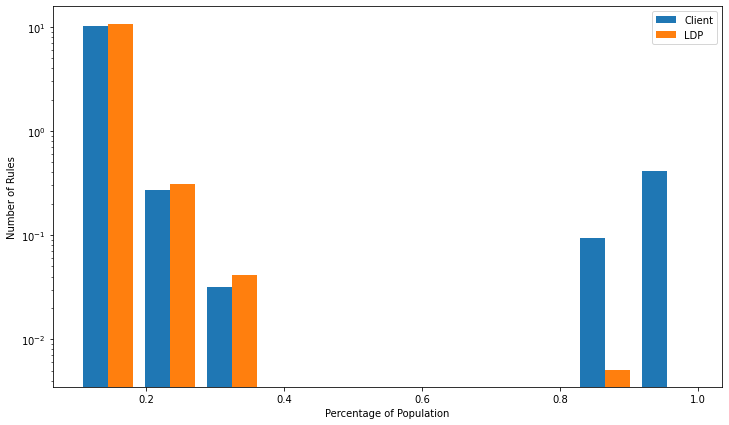

In [14]:
#make list of rule counts x population percents

lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, countDF['Client Count'].values], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()


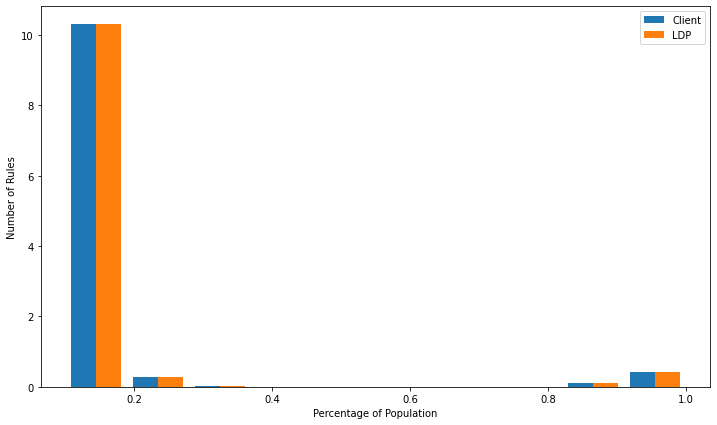

In [18]:
lst = []
for idx, row in clientDF.iterrows():
    lst.extend([row['Percent of Population'] for i in range(row['Rule Count'])])
    
n_bins = 10

plt.figure(figsize=(12, 7))
plt.hist([lst, lst], n_bins, density=True, histtype='bar',label=['Client', 'LDP'])
plt.xlabel("Percentage of Population")
plt.ylabel("Number of Rules")
plt.yscale('log')
plt.legend()

In [ ]:
#queries 3000 icu
#queries 5000 sepsis

rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 553]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]


rulesCov = [0, 1, 5, 50, 70, 100, 180, 200, 260, 315, 335, 360, 390, 420, 460, 500, 553]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000]


plt.figure(figsize=(12, 7))
plt.title("ICU Query Analysis")
plt.axhline(y=553, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

In [ ]:
rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 999]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]

rules = [0, 0, 1, 5, 50, 80, 100, 120, 200, 220, 250, 260, 300, 340, 380, 402, 430, 460, 
              490, 510, 550, 600, 700, 800, 900, 950, 999]
queries = [1, 50, 100, 300, 600, 1000, 1300, 1600, 2000, 2300, 2600, 3000, 3300, 3600, 4000, 4300, 4600, 5000, 
              5300, 5600, 6000, 6300, 6600, 7000, 7300, 7600, 8002]



rulesCov = [0, 1, 5, 50, 70, 80, 100, 120, 155, 180, 200, 230, 250, 300, 360, 400, 500, 540, 
              600, 650, 660, 700, 730, 840, 900, 980, 999]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 
              3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5002]



plt.figure(figsize=(12, 7))
plt.title("Sepsis Query Analysis")
plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()

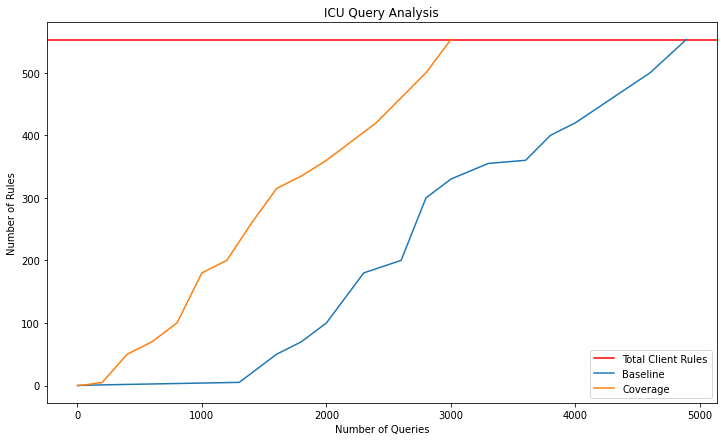

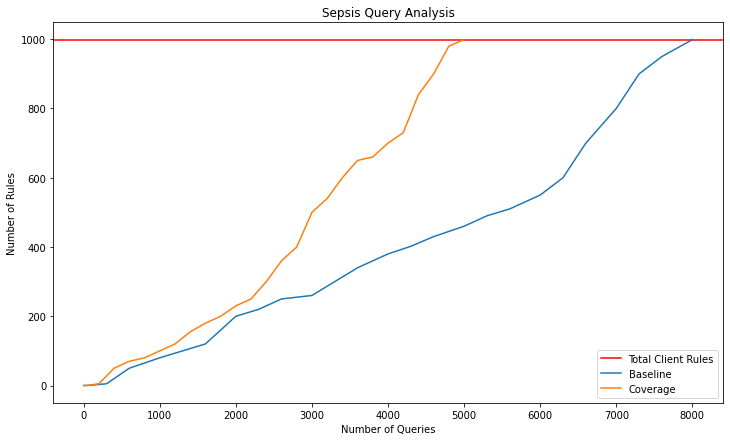

In [58]:
rules = [0, 1, 5, 50, 70, 100, 180, 200, 300, 330, 355, 360, 400, 420, 460, 500, 999]
queries = [1, 200, 1300, 1600, 1800, 2000, 2300, 2600, 2800, 3000, 3300, 3600, 3800, 4000, 4300, 4600, 4890]

rules = [0, 0, 1, 5, 50, 80, 100, 120, 200, 220, 250, 260, 300, 340, 380, 402, 430, 460, 
              490, 510, 550, 600, 700, 800, 900, 950, 999]
queries = [1, 50, 100, 300, 600, 1000, 1300, 1600, 2000, 2300, 2600, 3000, 3300, 3600, 4000, 4300, 4600, 5000, 
              5300, 5600, 6000, 6300, 6600, 7000, 7300, 7600, 8002]



rulesCov = [0, 1, 5, 50, 70, 80, 100, 120, 155, 180, 200, 230, 250, 300, 360, 400, 500, 540, 
              600, 650, 660, 700, 730, 840, 900, 980, 999]
queriesCov = [1, 63, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3200, 
              3400, 3600, 3800, 4000, 4200, 4400, 4600, 4800, 5002]



plt.figure(figsize=(12, 7))
plt.title("Sepsis Query Analysis")
plt.axhline(y=999, color='r', linestyle='-', label='Total Client Rules')
plt.plot(queries, rules, label='Baseline')
plt.plot(queriesCov, rulesCov, label='Coverage')
plt.xlabel("Number of Queries")
plt.ylabel("Number of Rules")
plt.legend()